<a href="https://colab.research.google.com/github/DaverArenas/procesamientoSe-alesInteligenciaArtificial/blob/main/Clase2E1_15_09_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ Introducción - Parte 1

Este script contiene la introducción al procesamiento de señales y se encuentra dividido en 4 partes que las veremos de acuerdo a como vayamos avanzando en el tema. 
- **Parte 1:** generación de una señal 
- **Parte 2:** procesamiento
- **Parte 3:** transformada de fourier
- **Parte 4:** filtrado



In [51]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import norm

## Generar una señal
Vamos a generar una señal sinusoidal
El eje X representa el tiempo y el donde el eje Y representa la amplitud de la onda sinusoidal y el eje X el tiempo.


*La señal sinusoidal es una curva que describe una oscilación repetitiva y suave y es muy importante en física debido al hecho descrito por el **teorema de Fourier** (qué vamos a ver más adelante) que dice que toda onda, cualquiera que sea su forma, puede expresarse de manera única como superposición (suma) de ondas sinusoidales de longitudes de onda y amplitudes definidas.*

La señal está representada por la ecuación: 
> $ A * sin (\omega t)$

Donde: 


*  $A$: amplitud
*  $t$: tiempo
*  $\omega$: frecuencia











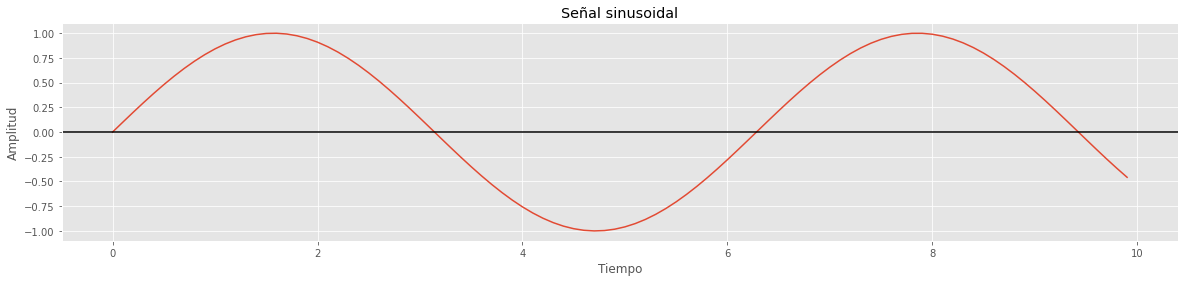

In [52]:
time = np.arange(0, 10, 0.1)
amplitude = np.sin(time)
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,4))
  plt.plot(time, amplitude)
  plt.title("Señal sinusoidal")
  plt.xlabel("Tiempo")
  plt.ylabel("Amplitud")
  plt.axhline(y=0, color='k')

Ahora vamos a generar nuevamente una señal sinusoidal pero vamos a detallar los parámetros. 
Vamos a generar un vector de tiempo que comienza en 0 segundos y va hasta 10 segundos en un intervalo o frecuencia de muestreo de 1000. 

In [53]:
sample_rate = 1000 # Numero de puntos por segundo 
# Eje X
start_time = 0
end_time = 10

time2 = np.arange(start_time, end_time, 1/sample_rate)

- **Frecuencia:** Vamos a generar una variable para manejar la frecuencia de la señal, es decir, cuantas veces la onda oscila en un segundo. Por ejemplo, si la señal se repite 3 veces por segundo, entonces se puede decir que la frecuencia es 3Hz.
- **Amplitud:** sería la altura máxima de las oscilaciones.
- **Fase:** sería el ángulo theta para desplazamiento de la señal en el tiempo. 

> $ signal = A * sin (2 \pi f t + \theta)$

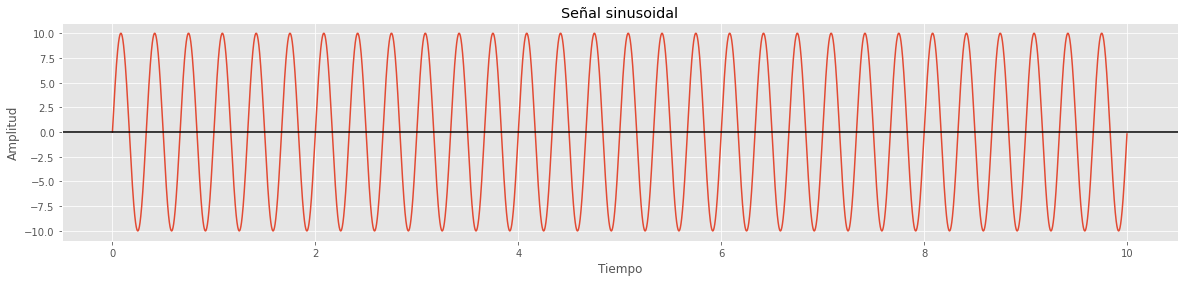

In [54]:
frequency = 3

amplitude = 10
theta = 0

sinewave = amplitude * np.sin(2 * np.pi * frequency * time2 + theta)
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,4))
  plt.plot(time2, sinewave)
  plt.title("Señal sinusoidal")
  plt.xlabel("Tiempo")
  plt.ylabel("Amplitud")
  plt.axhline(y=0, color='k')

## Cargar una señal
En este código vamos a cargar una señal continua de ECG en python.


In [55]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
pathFile = '/content/drive/MyDrive/Especializacion BigData EIA/Procesamiento_Señales/Clase_2'
nameFile = 'ECG'

In [57]:
read_Data = pd.read_csv(pathFile +'/'+ nameFile+'.csv')
dataset = pd.DataFrame(read_Data)
dataset.head()

,time,II
0,0.000,51
1,0.001,73
2,0.002,48
3,0.003,16
4,0.004,12


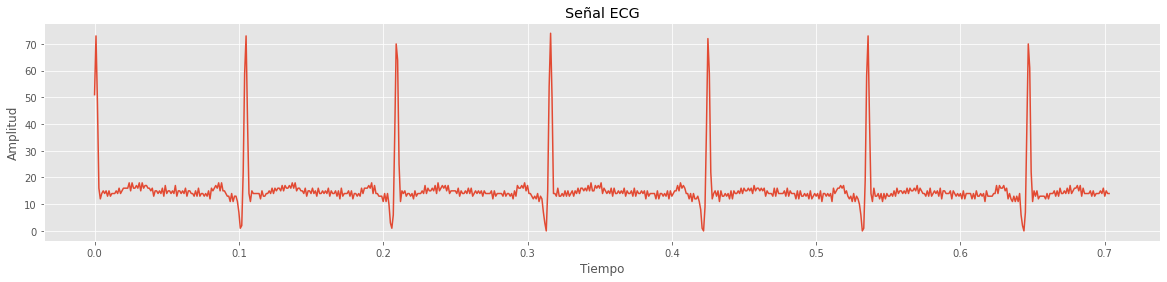

In [58]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,4))
  plt.ylabel('Amplitud')
  plt.xlabel('Tiempo')
  plt.title("Señal ECG")
  plt.plot( dataset['time'], dataset['II'])

In [59]:
pathFile = '/content/drive/MyDrive/Especializacion BigData EIA/Procesamiento_Señales/Clase_2'
nameFile = 'PT'
read_Data = pd.read_csv(pathFile +'/'+ nameFile+'.csv',delimiter = ';' )
dataset2 = pd.DataFrame(read_Data)
dataset2.head()

,time,PT
0,0.000,1267.50
1,0.001,972.25
2,0.002,1074.00
3,0.003,1203.25
4,0.004,1110.00


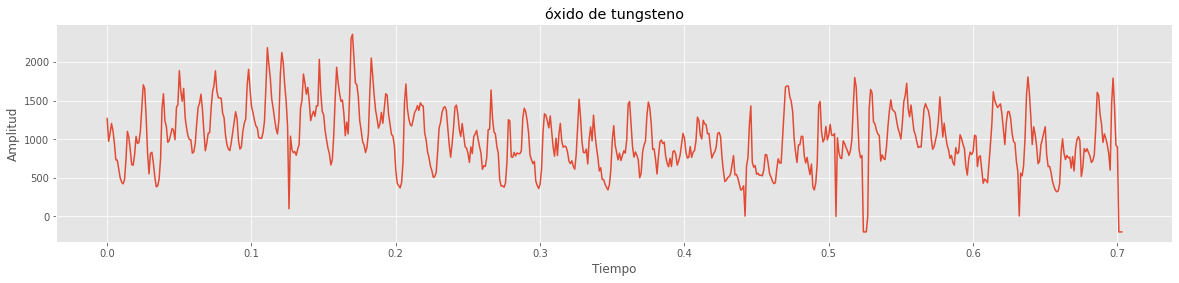

In [60]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,4))
  plt.ylabel('Amplitud')
  plt.xlabel('Tiempo')
  plt.title("óxido de tungsteno")
  plt.plot( dataset2['time'], dataset2['PT'])

# Procesamiento - Parte 2
Cómo primera parte de procesamiento vamos a adicionar una señal de ruido a la señal base.

## Ruido

Adicionar ruido de alta frecuencia a la señal original.

- La señal de alta frecuencia distorsiona morfológicamente la señal original

704


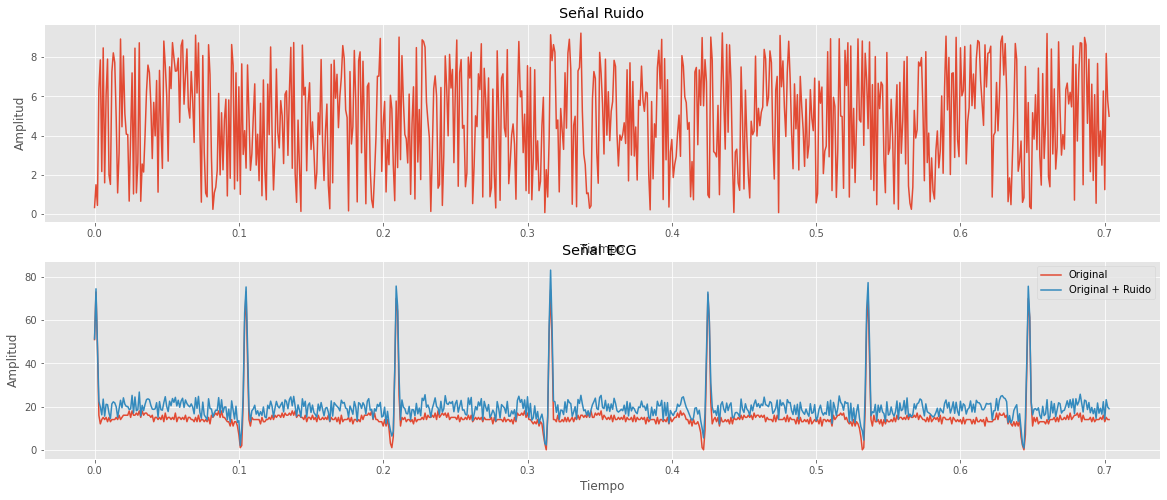

In [61]:
n = len(dataset['II'])
print(n)
# Señal de alta frecuencia 
dataNoiseHigh = []           
for i in range(0, n):
  dataNoiseHigh.append(random.random()* max(dataset['II']/8))

dataModifiedHigh = dataset['II'] + dataNoiseHigh
with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(20,8))
  ax1 = fig.add_subplot(211)
  ax1.plot(dataset['time'], dataNoiseHigh)
  ax1.set_xlabel('Tiempo')
  ax1.set_ylabel('Amplitud')
  ax1.set_title("Señal Ruido")
  
  ax2 =  fig.add_subplot(212)
  ax2.plot(dataset['time'], dataset['II'], label = "Original")
  ax2.plot(dataset['time'], dataModifiedHigh, label = "Original + Ruido")
  ax2.set_xlabel('Tiempo')
  ax2.set_ylabel('Amplitud')
  ax2.set_title("Señal ECG ")

  plt.legend()

- Ahora vamos a generar una señal senoidal para generar otro ruido de baja frecuencia. 

In [62]:
fs = 100                                                                        # Fs Frecuencia de muestreo
ts = 1/fs                                                                       # Periodo de muestreo
t = np.arange(0, (n * ts), ts)

dataNoiseLow = np.sin(0.5 * np.pi*t ) * max(dataset['II']/8)                    # Señal de baja frecuencia
dataModifiedLow = dataset['II'] + dataNoiseLow

- Los ruidos de baja frecuencia modifican la línea base de la señal. 

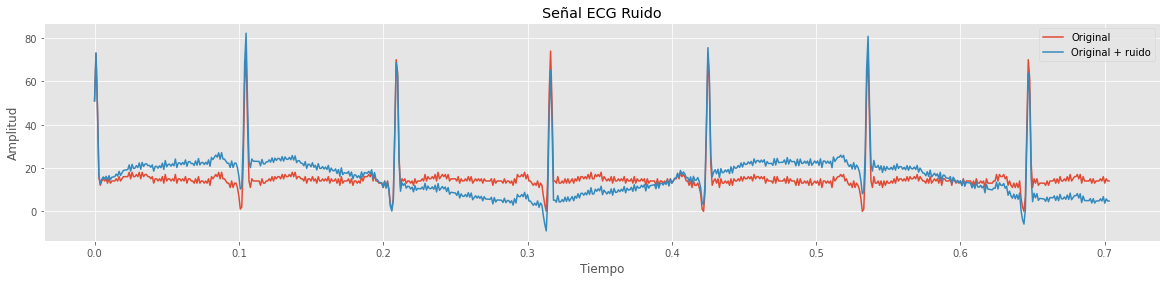

In [63]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,4))
  plt.ylabel('Amplitud')
  plt.xlabel('Tiempo')
  plt.title("Señal ECG Ruido")
  plt.plot(dataset['time'], dataset['II'], label ="Original")
  plt.plot( dataset['time'], dataModifiedLow, label = "Original + ruido")
  plt.legend()

### Qué es una señal de ruido blanco?
- **Una señal con ruido blanco**: es una señal aleatoria (proceso estocástico) que se caracteriza por el hecho de que sus valores de señal en dos tiempos diferentes no guardan correlación estadística. Como consecuencia de ello, su densidad espectral de potencia (DEP), es una constante, es decir, su gráfica es plana. Esto significa que la señal contiene todas las frecuencias y todas ellas muestran la misma potencia.

Ahora vamos a generar una señal con ruido blanco y sin ruido blanco a partir de la evaluación de un polimonio y una señal sinusoidal.

Función para la evaluación de un polinomio según los coeficientes determinados. 

>$y = a x^{3} + b x^{2} + c x + d $

In [64]:
# Función que evalua la señal de acuerdo con los coeficientes del polinomio
def polEval(signal, a,b,c,d):
  return a*signal**3  + b*signal**2 + c*signal + d

In [65]:
N = 1e4                                                                         # Numero de muestras
n = np.arange(0, N-1)                                                           # Arreglo de muestras desde 0 hasta 10000
fs = 3600                                                                       # Hz frecuencia de muestreo
f0 = 180                                                                        # Hz frecuencia de la senal
t = n/fs                                                                        # Tiempo a partir del arreglo de las muestras.
y = np.sin(2 * math.pi * f0 * t)                                                # Generación de la señal sinusoidal.
noise = []                                                                      # Generación de una señal de ruido blanco a partir de valores aleatorios con una distribución 
                                                                                # normal a partir de la señal sinusoidal. 
for i in range(0,len(y)):
  noise.append(random.normalvariate(np.mean(y), 1))

x = noise + y                                                                   # Señal sinusoidal sumado a la señal de ruido blanco. 
evalX = polEval(x, 0.8,  0.75, 1, 0)                                            # Evaluación del polinomio para la señal sinusoidal con ruido blanco. 
evalY = polEval(y, 0.5,  0.75, 1, 0)                                            # Evaluación del polinomio para la señal sin ruido blanco. 


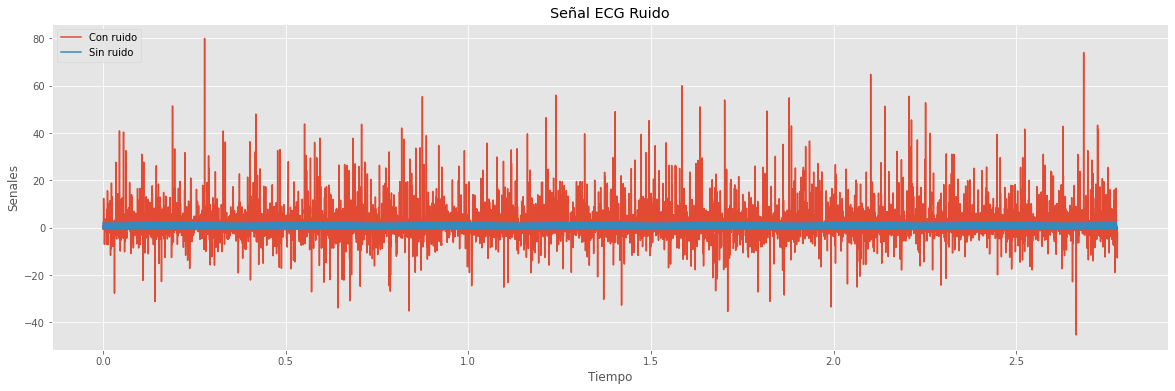

In [66]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,6))
  plt.ylabel('Senales')
  plt.xlabel('Tiempo')
  plt.title("Señal ECG Ruido")
  plt.plot( t , evalX, label="Con ruido")
  plt.plot(t, evalY, label="Sin ruido")
  plt.legend()


- Ahora vamos a realizar un acercamiento de las señales de ruido. 

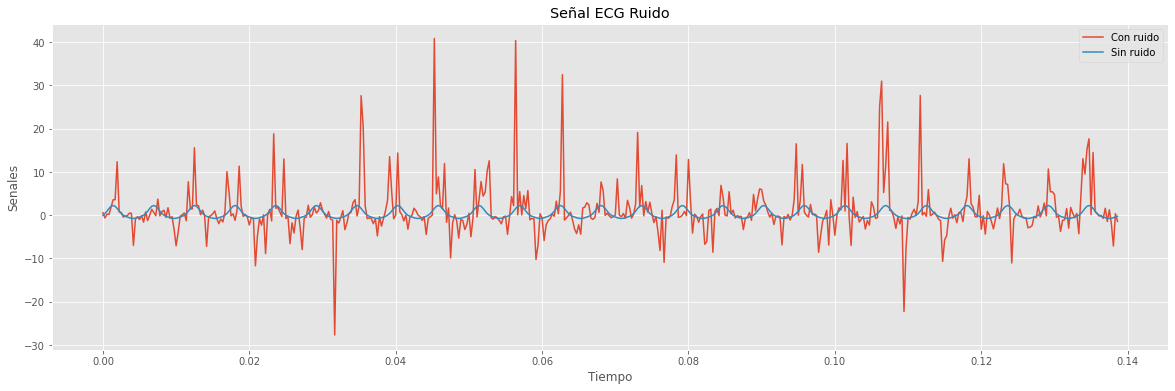

In [67]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,6))
  plt.ylabel('Senales')
  plt.xlabel('Tiempo')
  plt.title("Señal ECG Ruido")
  plt.plot( t[0:500], evalX[0:500], label="Con ruido")
  plt.plot( t[0:500], evalY[0:500], label="Sin ruido")
  plt.legend()

### Analizar el ruido


#### Puntos de inflexión

Es necesario conocer el número de puntos de inflexión para saber si la señal es de tipo aleatorio, esta es una prueba de aleatoriedad utilizada comunmente.

Dada una señal de $N$ muestras, una señal aleatoria esta dada por la siguiente condición:

> Si el número de puntos de inflexión $> \frac{2}{3} (N - 2) $

La función ```turning_points()``` devuelve los indices de los puntos de inflexión máximos y mínimos en listas separadas. 



In [68]:
def turning_points(array):
    ''' 
    Encuentra los puntos de inflexión dentro de una matriz 1D y devuelve los 
    índices de los puntos de inflexión mínimo y máximo en dos listas separadas.
    '''
    idx_max, idx_min = [], []
    if (len(array) < 3): 
        return idx_min, idx_max

    NEUTRAL, RISING, FALLING = range(3)                                         # Asigna el valor de NEUTRAL = 0, RISING = 1, FALLING = 2
    def get_state(a, b):
        ''' 
        Función que retorna el valor de 1 si la diferencia entre los puntos es 
        positiva, 2 si es negativa y 0 si no hay diferencia
        '''
        if a < b: return RISING
        if a > b: return FALLING
        return NEUTRAL

    ps = get_state(array[0], array[1])                                          # Asignación de valores iniciales
    begin = 1
    for i in range(2, len(array)):
        s = get_state(array[i - 1], array[i])
        if s != NEUTRAL:
            if ps != NEUTRAL and ps != s:
                if s == FALLING: 
                    idx_max.append((begin + i - 1) // 2)
                else:
                    idx_min.append((begin + i - 1) // 2)
            begin = i
            ps = s
    return idx_min, idx_max

3243 3244


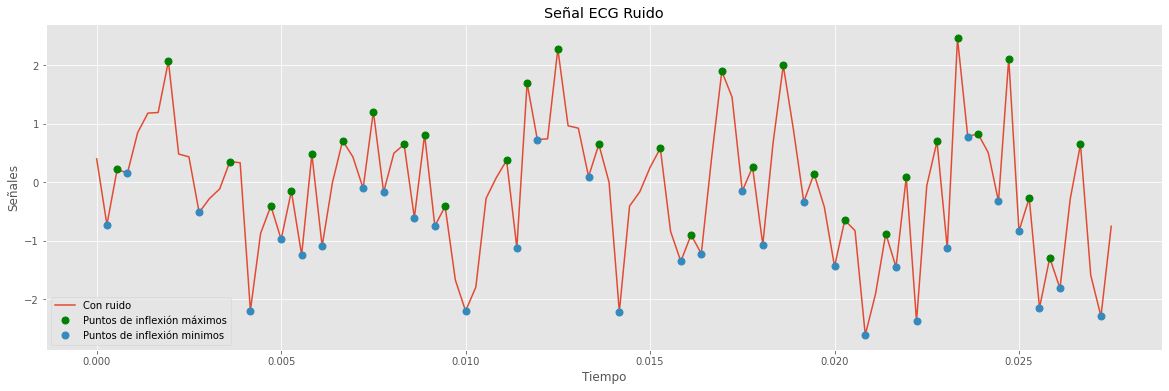

In [69]:
evaluateSignal = np.array(x)
idMin, idMax = turning_points(evaluateSignal)

lenGraph = 100
valMin, valMax = turning_points(evaluateSignal[0:lenGraph])

print(len(idMax), len(idMin))
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,6))
  plt.ylabel('Señales')
  plt.xlabel('Tiempo')
  plt.title("Señal ECG Ruido")
  plt.plot( t[0:lenGraph], evaluateSignal[0:lenGraph], label="Con ruido")
  plt.plot(t[idMax[0:len(valMax)]], evaluateSignal[idMax[0:len(valMax)]], 'go', markersize = 7, label='Puntos de inflexión máximos')
  plt.plot(t[idMin[0:len(valMin)]], evaluateSignal[idMin[0:len(valMin)]], 'o', markersize = 7, label='Puntos de inflexión minimos')
  plt.legend()


In [70]:
if len(idMin)+len(idMax) > (2/3)*(len(evaluateSignal) - 2):
  print("Es una señal aleatoria")
else:
  print("No es una señal aleatoria")

print("Puntos de inflexión: ", len(idMin)+len(idMax), "\nPrueba de aleatoriedad: ", (2/3)*(len(evaluateSignal) - 2))

No es una señal aleatoria
Puntos de inflexión:  6487 
Prueba de aleatoriedad:  6664.666666666666


### - Ahora vamos a probar con la evaluación de los polinomios
`evalX` y `evalY`
###**Cuál podríamos decir como una señal aleatoria?** 

### Análisis estadístico de proceso aleatorio

- Un proceso aleatorio es caracterizado por la función de densidad de probabilidad (PDF - *probability density function*), la cual describe la probabilidad relativa según la cual dicha variable aleatoria tomará un determinado valor. Para las distribuciones discretas, este proceso se llama PMF (*Probability mass function*)
- **Varianza:** es la variabilidad de una serie de datos respecto a la media. 
- **Asimetría:** grado de asimetría que presenta una distribución de probabilidad de una variable aleatoria. 
- **Curtosis:**  forma de distribución de frecuencias. Una curtosis grande implica una mayor concentración de valores ed la variable cerca de la media como en las colas. 
- **Entropía:** medida de la incertidumbre y de la información necesaria para, en cualquier proceso, poder acotar, reducir o eliminar la incertidumbre.
- **Coeficiente de variación (CV):** es la relación entre la media y la vaiabilidad de la señal. 



Primero vamos a mostrar el histograma que se genera con la señal de ruido. 

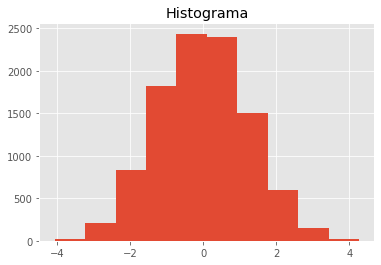

In [71]:
with plt.style.context('ggplot'):
  plt.hist(evaluateSignal)
  plt.title("Histograma")

Luego vamos a crear una distribución normal continua con los parámetros de media y desviación del ruido. 

In [72]:
meanSignal =  np.mean(evaluateSignal)
stdSignal = np.std(evaluateSignal)

dist = norm(loc = meanSignal, scale = stdSignal)

Ahora vamos a mostrar el histograma normalizado para que sea comparado con el función de densidad de distribución para eso debemos colocar el parámetro *density* como verdadero. 

Para mostrar el PDF, puesto que es una curva infinita se debe elegir un valor mínimo y máximo para el eje X. En nuestro caso vamos a representar entre el percentil 0.001 y 0.999 y vamos a tomar 100 puntos de la gráfica. 

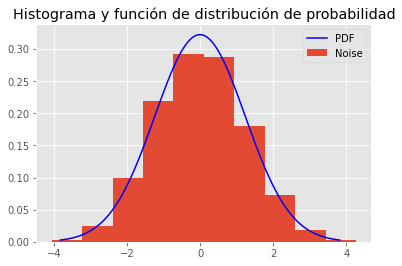

In [73]:
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)
with plt.style.context('ggplot'):
  plt.hist(evaluateSignal, density=True, label = "Noise")
  plt.title("Histograma y función de distribución de probabilidad")
  plt.plot(x, dist.pdf(x), "b-", label = "PDF")
  plt.legend()

In [74]:
mean, var, skew, kurt = norm.stats(loc = meanSignal, scale = stdSignal, moments='mvsk')    #Función de la libería scypi.stats
print("Media: ", mean)
print("Desviación estándar: ", stdSignal )
print("Varianza: ", var)
print("Asimetría: ", skew)
print("Curtosis: ", kurt)
print("Coeficiente de variación: ", stdSignal/mean)

Media:  -0.004263130089885142
Desviación estándar:  1.2368815903749601
Varianza:  1.5298760686084907
Asimetría:  0.0
Curtosis:  0.0
Coeficiente de variación:  -290.1346110243341


## Frecuencia del ruido. 

Vamos a calcular la densidad espectral de potencia (PSD *Power Spectral Density*), es decir, vamos a graficar la potencia de dicha señal sobre las distintas frecuencias en donde está formada. 
Con esta función podemos establecer el rango de frecuencias donde se concentran las variaciones de potencia. La observación del comportamiento de señales en el dominio de la frecuencia resulta de gran ayuda, ya que se pueden discriminar las variaciones más fácilmente que en el dominio del tiempo. 


*La DEP se ha utilizado en el análisis de eventos clínicos, por ejemplo, en la detección de latidos cardiacos patológicos* 

In [75]:
from scipy import signal

# Función que calcula la densidad espectral de potencia
# Recordemos que fs  es la frecuencia de muestreo definida previamente 
# La señal evalX estaba definida como la evaluación polinomica de la señal sinusoidal más el ruido blanco
f, Pxx_den = signal.welch(evalX , fs)                


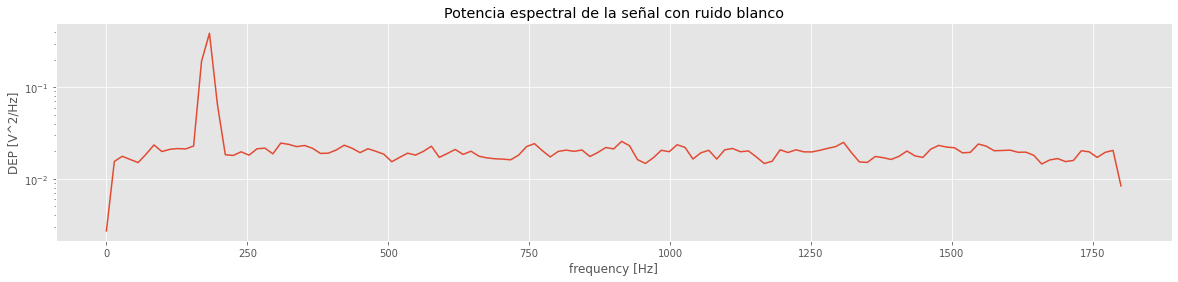

In [76]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,4))
  plt.semilogy(f, Pxx_den)
  plt.title('Potencia espectral de la señal con ruido blanco')
  plt.xlabel('frequency [Hz]')
  plt.ylabel('DEP [V^2/Hz]')
  plt.show()

La densidad espectral de potencia representa así la distribución de una señal en función del espectro de frecuencias.

- Ahora vamos s probar con la señal sinusoidal evaluada en el polinomio.

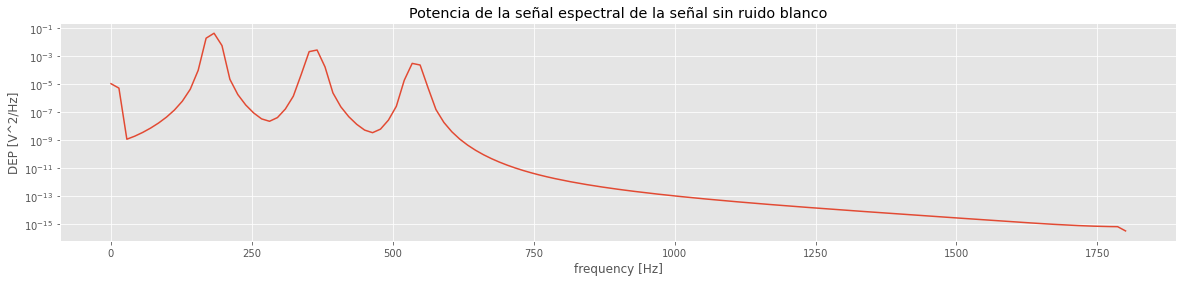

In [77]:
f2, Pxx_den2 = signal.welch(evalY , fs)
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,4))
  plt.semilogy(f2, Pxx_den2)
  plt.title('Potencia de la señal espectral de la señal sin ruido blanco')
  plt.xlabel('frequency [Hz]')
  plt.ylabel('DEP [V^2/Hz]')
  plt.show()

Vamos a buscar la frecuencia donde la densidad espectral es es mayor que el promedio. 

In [78]:
print("Frecuencias máximas con ruido blanco" , f[Pxx_den > Pxx_den.mean()])
print("Frecuencias máximas sin ruido blanco" , f2[Pxx_den2 > Pxx_den2.mean()], "\n")

print("Densidad espectral media de la señale con ruido blanco " , Pxx_den.mean())
print("Densidad espectral media de la señale sin ruido blanco " , Pxx_den2.mean(), "\n")

print("Valor máximo de la densidad espectral con ruido blanco", Pxx_den.max())
print("Valor máximo de la densidad espectral sin ruido blanco", Pxx_den2.max(), "\n")

print("Frecuencia máxima con respecto a la densidad espectral con ruido blanco", f[Pxx_den == Pxx_den.max()])
print("Frecuencia máxima con respecto a la densidad espectral sin ruido blanco", f2[Pxx_den2 == Pxx_den2.max()])

Frecuencias máximas con ruido blanco [ 168.75    182.8125  196.875   309.375   759.375   914.0625 1307.8125
 1546.875 ]
Frecuencias máximas sin ruido blanco [168.75   182.8125 196.875  351.5625 365.625 ] 

Densidad espectral media de la señale con ruido blanco  0.023826984411045533
Densidad espectral media de la señale sin ruido blanco  0.0005642914473055261 

Valor máximo de la densidad espectral con ruido blanco 0.38895448737667565
Valor máximo de la densidad espectral sin ruido blanco 0.042555632197825786 

Frecuencia máxima con respecto a la densidad espectral con ruido blanco [182.8125]
Frecuencia máxima con respecto a la densidad espectral sin ruido blanco [182.8125]


# Transformada de Fourier - Parte 3

Para calcular la transformada de fourier necesitamos dos funciones de la librería ``` scipy.fftpack```.

* `fft` Devuelve la DFT de la señal de etrada, para que el valor quede normalizado se debe dividir por el el valor del número de muestras. 

* `fftfreq` devuelve las frecuencias a las que corresponde cada punto de la DFT. 





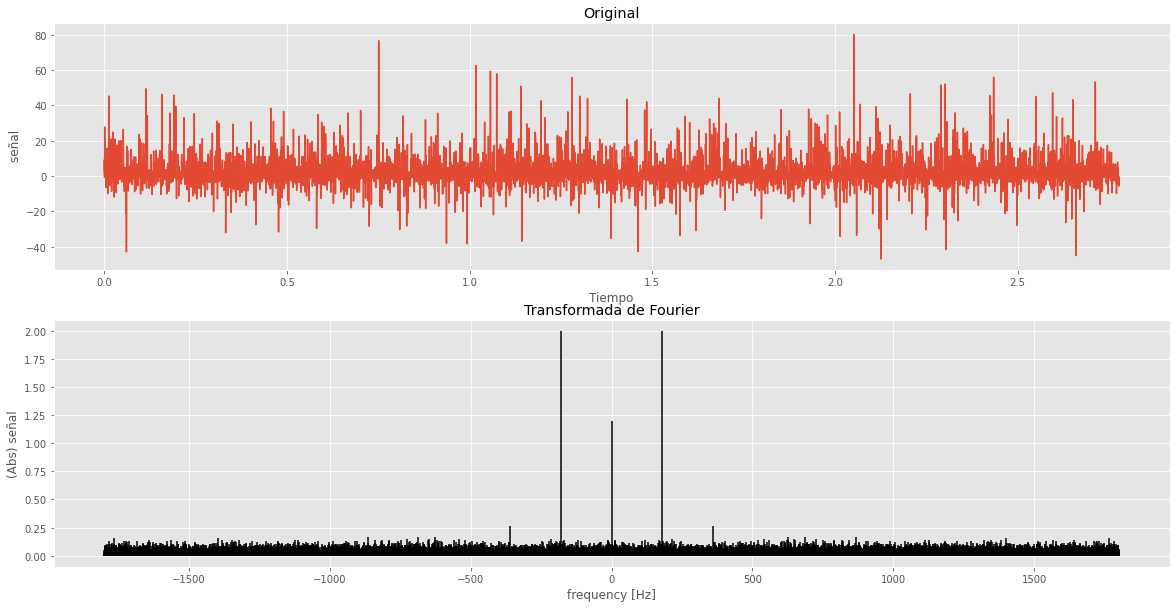

In [49]:
from scipy.fftpack import fft, fftfreq

signalTrans = evalX
dft = fft(signalTrans) / len(t)
freq = fftfreq(len(t), (t[1]-t[0]))

with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(20,10))
  ax1 = fig.add_subplot(211)
  ax1.plot(t, signalTrans)
  ax1.set_xlabel('Tiempo')
  ax1.set_ylabel(' señal')
  ax1.set_title("Original")

  ax2 =  fig.add_subplot(212)
  ax2.vlines(freq, 0 , abs(dft))
  ax2.set_xlabel('frequency [Hz]')
  ax2.set_ylabel('(Abs) señal')
  ax2.set_title("Transformada de Fourier")

  plt.show()


In [50]:
print("Valor de la frecuecia máxima" , freq[np.where(abs(dft) == max(abs(dft)))])

Valor de la frecuecia máxima [ 180.0180018 -180.0180018]


# Filtros - Parte 4

A continuación, vamos a ver los diferentes tipos de filtro para eliminar el ruido, artfactos y/o señales no deseadas de la señal que se quiere analizar.

### Filtros FIR

Finite Impulse Response

Son sistemas que presentan una respuesta al impulso de duración finita. 
Inicialmente vamos a realizar la implementación del filtro de media móvil y el derivador Savitzky Golay. 


#### Filtro de media móvil 

En su forma más simple, un filtro de media móvil de longitud N toma el promedio de cada N muestras consecutivas de la forma de onda.
Es utilizado como filtro de suavizado para las señales y su desempeño es óptimo para eliminar ruido blanco.

- **maFiler:** es una función que tiene como parámetro de entrada la señal, la variable independientes y la cantidad de muestras consecutivas en la cual se calculará el promedio. 



In [80]:
 # Recibe la señal, recibe el tiempo total y el tamaño de la ventana 
def maFilter(x, N):                           
  xTemp = np.zeros([len(x) + (N-1)]) 
  xTemp[(N-1):] = x
  y = np.zeros(x.shape)
  
  for i in range(0, len(x)):
    y[i] = xTemp[i:i +N]. sum() / float(N)
  return y

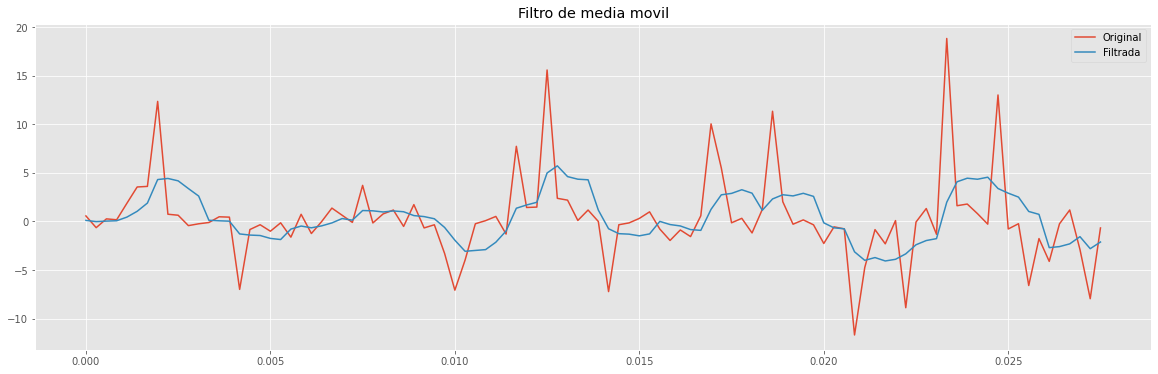

In [84]:
window = 5                                                                      # Cantidad de muestras 
lengthPlot = 100
signalEv = evalX                                                                # Señal con ruido blanco
signalFilter = maFilter(signalEv, window)

with plt.style.context('ggplot'):
  plt.figure(figsize=(20,6))
  plt.plot(t[0:lengthPlot],signalEv[0:lengthPlot], label = "Original")
  plt.plot(t[0:lengthPlot],signalFilter[0:lengthPlot],  label = "Filtrada")
  plt.title("Filtro de media movil")
  plt.legend()

**Ahora es tu turno prueba que pasa con la señal de ECG  dataset['time'] y con la señal dataModifiedHigh**

#### Filtro Derivador Savitzky - Golay

La principal ventaja de esta aproximación es que tiende a preservar características de la distribución inicial tales como los máximos y mínimos relativos, así como el ancho de los picos, que normalmente desaparecen con otras técnicas de promediado (como la media desplazada).

Parámetros de la función `savgo_filter`: 


1.   Señal
2.   Tamañano de la ventana 
3.   Orden del polinomio



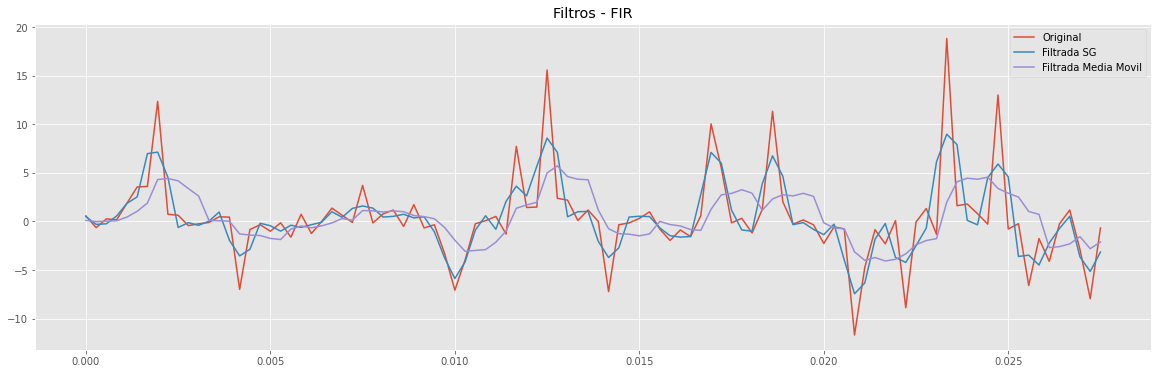

In [85]:
from scipy.signal import savgol_filter

window =   5                                                                     # Cantidad de muestras debe ser un valor impar
polOrder = 3                                                                    # Orden del polinomio menor a la ventana
lengthPlot = 100
signalEv = evalX
signalFilterSG = savgol_filter(signalEv, window, polOrder)                      # Parámetros: señal, tamaño de la ventana, orden del polinomio

with plt.style.context('ggplot'):
  plt.figure(figsize=(20,6))

  plt.plot(t[0:lengthPlot],signalEv[0:lengthPlot], label = "Original")
  plt.plot(t[0:lengthPlot],signalFilterSG[0:lengthPlot],  label = "Filtrada SG")
  plt.plot(t[0:lengthPlot],signalFilter[0:lengthPlot],  label = "Filtrada Media Movil")

  plt.title("Filtros - FIR")
  plt.legend()


### Filtros IIR

 Infinite Impulse Response

 A continuación vamos a implementar los filtros más comunes tipo IIR, que son el Butterworth y el Chevychev tipo I y Tipo II.
 
Los filtros IIR pertenecen a los filtros que trabajan con las componentes de frecuencia de las señales. Dentro de estos filtros existen cuatro tipos elementales de filtrado: pasa-bajas, pasa-banda, pasa-altas y rechaza bandas.

#### Filtro Butterworth

Debemos encontrar primero los coeficientes del filtro. 
Para esto vamos a utilizar la función de  ``` butter```, donde se debe definir los siguientes parámetros:


1. El orden del filtro.

2. Wn: La frecuencia o frecuencias críticas. De forma predeterminada, fs es 2 medios ciclos / muestra, por lo que estos se normalizan de 0 a 1, donde 1 es la frecuencia de Nyquist. (Por tanto, Wn está en semiciclos / muestra).

3. Tipo `{' lowpass ', 'highpass', 'bandpass', 'bandstop'}`, opcional
El tipo de filtro. El valor predeterminado es 'pasa bajas'.


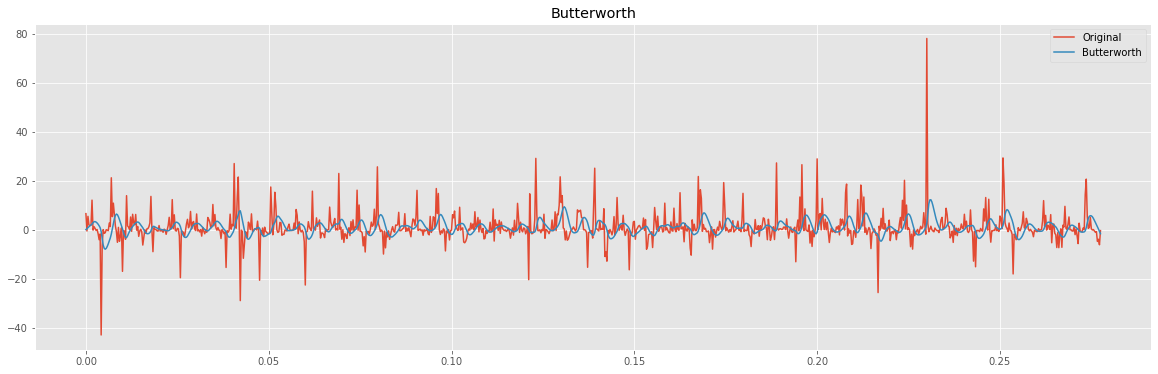

In [ ]:
from scipy import signal
from scipy.signal import freqz, butter, lfilter

nyq = fs *0.5
cutf = 180                                                                      # Frecuencia de corte
low = cutf / nyq                                                                # Frcuencia crítica 

b, a = signal.butter(2, low, 'lowpass' )                                    

y_filtered = lfilter(b, a, signalEv)
lengthPlot = 1000
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,6))
  plt.plot(t[0:lengthPlot],signalEv[0:lengthPlot], label = "Original")
  plt.plot(t[0:lengthPlot],y_filtered[0:lengthPlot],  label = "Butterworth")

  plt.title("Butterworth")
  plt.legend()

### Filtro Chebyshev TIPO I

De igual forma que el Butterworth se deben encontrar los coeficientes del filtro. Para esto utilizaremos la función ``` cheby1```, que tiene los siguientes parámetros. 



1.   Orden del filtro 
2.   Máximo valor de rizado
3.   Frecuencias críticas 
4.   Tipo `{' lowpass ', 'highpass', 'bandpass', 'bandstop'}`, opcional
El tipo de filtro. El valor predeterminado es 'pasa bajas'.







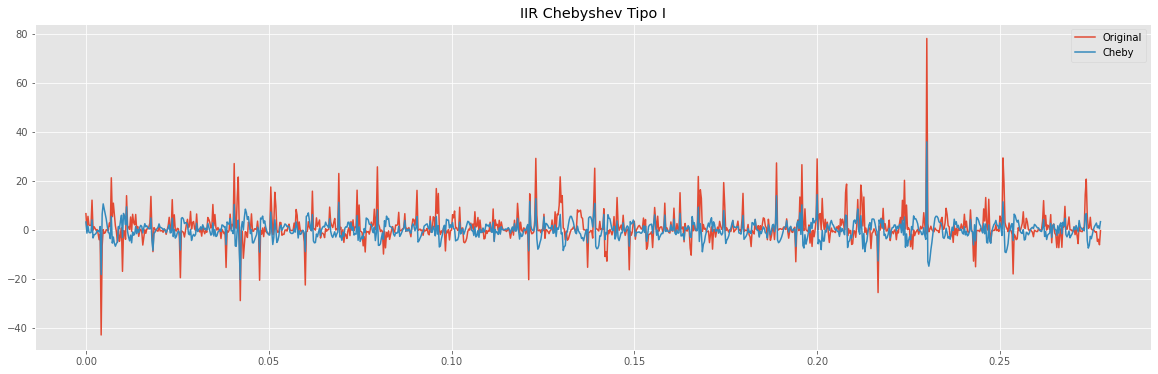

In [ ]:
b, a = signal.cheby1(2, 5, low, 'highpass')

y_filteredCheb = lfilter(b, a, signalEv )
lengthPlot = 1000
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,6))
  plt.plot(t[0:lengthPlot],signalEv[0:lengthPlot], label = "Original")
  plt.plot(t[0:lengthPlot],y_filteredCheb[0:lengthPlot],  label = "Cheby")

  plt.title("IIR Chebyshev Tipo I")
  plt.legend()

### Filtrado óptimo

El filtro de Wiener es un filtro lineal que se aplica de forma adaptativa a la varianza local de los datos.

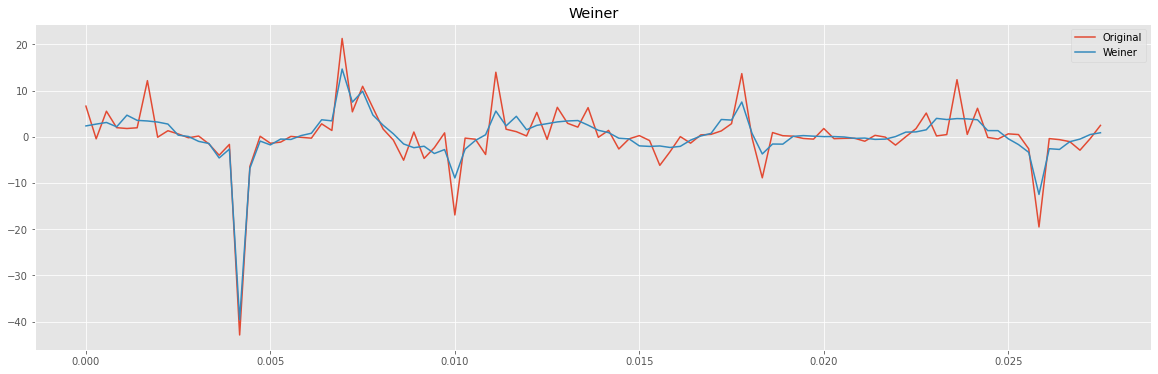

In [ ]:
y_filteredWiener = signal.wiener(signalEv, 5)         # Señal, tamaño de la ventana 
lengthPlot = 100
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,6))
  plt.plot(t[0:lengthPlot],signalEv[0:lengthPlot], label = "Original")
  plt.plot(t[0:lengthPlot],y_filteredWiener[0:lengthPlot],  label = "Weiner")

  plt.title("Weiner")
  plt.legend()

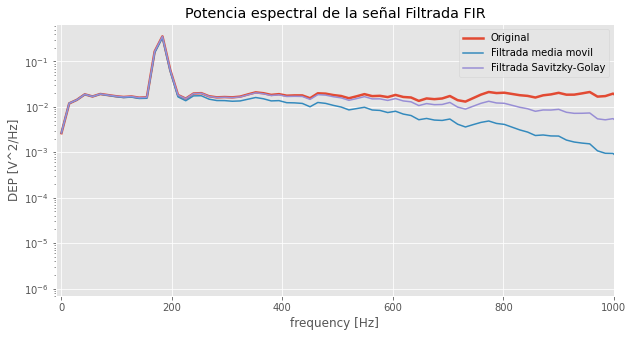

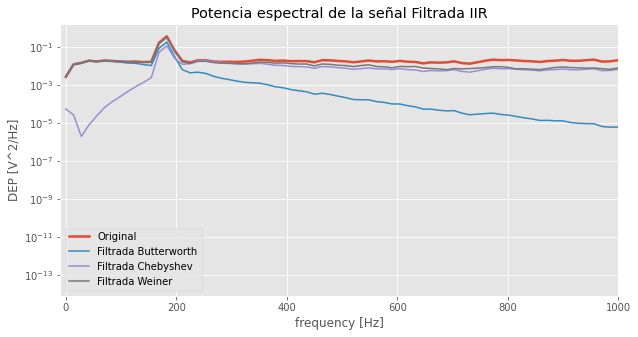

In [ ]:
fav, Pxx_denav = signal.welch(signalFilter, fs)
fsg, Pxx_densg = signal.welch(signalFilterSG, fs)
fbw, Pxx_denbw = signal.welch(y_filtered, fs)
fch, Pxx_dench = signal.welch(y_filteredCheb, fs)
fwi, Pxx_denwi = signal.welch(y_filteredWiener, fs)


with plt.style.context('ggplot'):
  plt.figure(figsize=(10,5))
  plt.semilogy(f, Pxx_den, label = "Original", linewidth=2.5)
  plt.semilogy(fav, Pxx_denav , label= "Filtrada media movil")
  plt.semilogy(fsg, Pxx_densg , label= "Filtrada Savitzky-Golay")

  plt.title('Potencia espectral de la señal Filtrada FIR')
  plt.xlabel('frequency [Hz]')
  plt.ylabel('DEP [V^2/Hz]')
  plt.legend()

  plt.xlim(-10, 1000)
  plt.show()

  plt.figure(figsize=(10,5))
  plt.semilogy(f, Pxx_den, label = "Original", linewidth=2.5)
  plt.semilogy(fbw, Pxx_denbw , label= "Filtrada Butterworth")
  plt.semilogy(fch, Pxx_dench , label= "Filtrada Chebyshev")
  plt.semilogy(fwi, Pxx_denwi , label= "Filtrada Weiner")


  plt.title('Potencia espectral de la señal Filtrada IIR')
  plt.xlabel('frequency [Hz]')
  plt.ylabel('DEP [V^2/Hz]')
  plt.legend()

  plt.xlim(-10, 1000)
  plt.show()

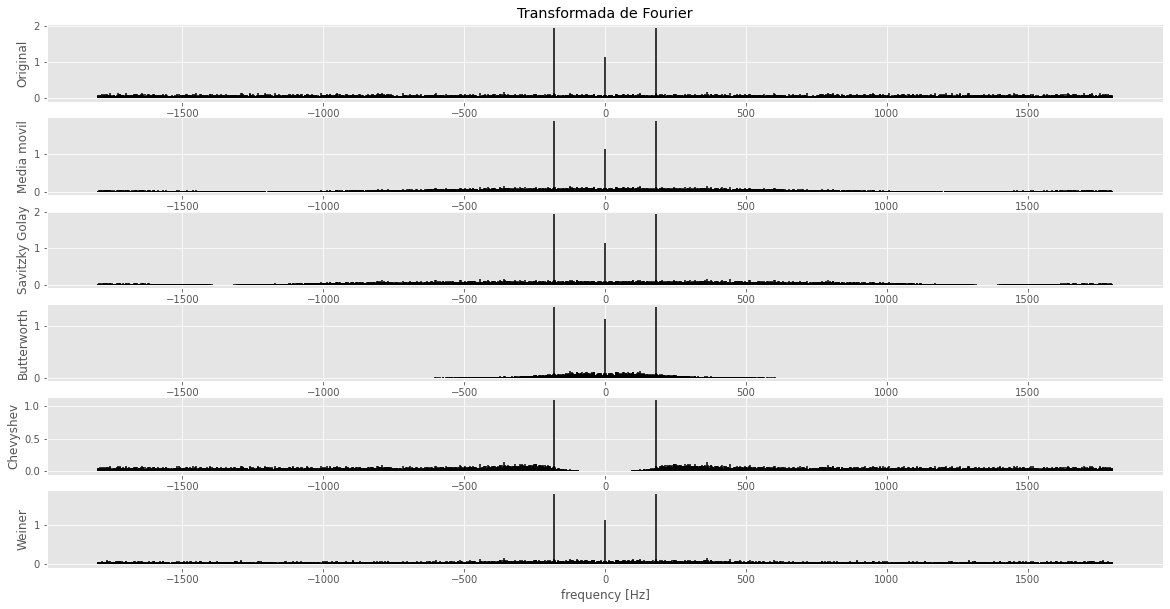

In [ ]:
dftor = fft(signalEv) / len(t)
dftav = fft(signalFilter) / len(t)
dftsg = fft(signalFilterSG) / len(t)
dftbw = fft(y_filtered) / len(t)
dftch = fft(y_filteredCheb) / len(t)
dftwi = fft(y_filteredWiener) / len(t)

freq = fftfreq(len(t), (t[1]-t[0]))

with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(20,10))
  ax1 = fig.add_subplot(611)
  ax1.vlines(freq, 0 , abs(dftor))
  ax1.set_title("Transformada de Fourier")
  ax1.set_ylabel("Original")


  ax2 =  fig.add_subplot(612)
  ax2.vlines(freq, 0 , abs(dftav))
  ax2.set_ylabel("Media movil")

  ax3 =  fig.add_subplot(613)
  ax3.vlines(freq, 0 , abs(dftsg))
  ax3.set_ylabel("Savitzky Golay")

  ax4 =  fig.add_subplot(614)  
  ax4.vlines(freq, 0 , abs(dftbw))
  ax4.set_ylabel("Butterworth")

  
  ax5 =  fig.add_subplot(615)
  ax5.vlines(freq, 0 , abs(dftch))
  ax5.set_ylabel("Chevyshev")

  ax6 =  fig.add_subplot(616)
  ax6.vlines(freq, 0 , abs(dftwi))
  ax6.set_ylabel("Weiner")
  ax6.set_xlabel('frequency [Hz]')

  plt.show()


# **Tú turno ⛳** 
Ahora vas a generar los filtros vistos en clase para la señal de ECG que cargamos previamente. Adicionalmente vas a probar la señal con un filtro chebyshev Tipo II y observar las diferencias entre los diferentes tipos. 
Cual es mejor?